##### Copyright 2026 Google LLC.


In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# TranslateGemma

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/google-gemini/gemma-cookbook/blob/main/Research/[TranslateGemma]Example.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

[TranslateGemma](https://huggingface.co/collections/google/translategemma) is a family of lightweight, state-of-the-art open translation models from Google, based on the Gemma 3 family of models.

TranslateGemma models are designed to handle translation tasks across 55 languages. Their relatively small size makes it possible to deploy them in environments with limited resources such as laptops, desktops or your own cloud infrastructure, democratizing access to state of the art translation models and helping foster innovation for everyone.

In this colab we provide you with some usage examples of the model to get you started quickly.

## Import necessary libraries

In [ ]:
from transformers import pipeline
import torch
from IPython.display import Markdown
import PIL                              # For displaying images
import requests                         # For downloading data
from IPython.display import Javascript  # For setting the height of the picture cell

### Add your HuggingFace token to Colab Secrets (if necessary)

1. Open your Google Colab notebook and click on the 🔑 Secrets tab in the left panel.

   <img src="https://storage.googleapis.com/generativeai-downloads/images/secrets.jpg" alt="You can find the Secrets tab on the left panel." width=50%>

1. Create a new secret with the name `HF_TOKEN`.
1. Copy and paste your HuggingFace token into the `Value` input box of `HF_TOKEN`.
1. Toggle the button on the left to allow all notebooks access to the secret.

In [ ]:
from google.colab import userdata
HF_TOKEN=userdata.get("HF_TOKEN")

### Create the pipeline

We will load smallest model (4B) for demonstration purposes. Usage of bigger models is similar.

In [ ]:
pipe = pipeline(
    "image-text-to-text",
    model="google/translategemma-4b-it",
    device="cuda",
    dtype=torch.bfloat16,
    token=HF_TOKEN,
)

config.json:   0%|          | 0.00/2.62k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/90.6k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/4.45G [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/128 [00:00<?, ?B/s]

processor_config.json:   0%|          | 0.00/70.0 [00:00<?, ?B/s]

chat_template.jinja:   0%|          | 0.00/17.0k [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json:   0%|          | 0.00/1.16M [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.69M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/33.4M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/35.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/662 [00:00<?, ?B/s]

Device set to use cuda


### Text translation

TranslateGemma is designed to work with a specific chat template supporting direct translation of a text input (see below for image translation). This chat template has been implemented with Hugging Face transformers’ chat templating system and is compatible with the apply_chat_template() function provided by the Gemma tokenizer and Gemma 3 processor. Notable differences from other models’ chat templates include:

TranslateGemma supports only User and Assistant roles.

* TranslateGemma’s User role is highly opinionated:
* The content property must be provided as a list with exactly one entry.
* The content list entry must provide:
  * A “type” property with the value “text”.
  * A “source_lang_code” property as a string
  * A “target_lang_code” property as a string
  * A “text” property containing only the text to translate
* The “source_lang_code” and “target_lang_code” property values can take one of one of two forms:
  * An ISO 639-1 Alpha-2 language code, e.g., `en`; or
  * A “regionalized” variant as an ISO 639-1 Alpha-2 language code and an ISO 3166-1 Alpha-2 country code pair separated by a dash or an underscore, e.g., `en_US` or `en-GB`, similar to the Unicode Common Locale Data Repository format.
* If the “source_lang_code” and “target_lang_code” property value is not supported by the model, an error will be raised when the template is applied.

In [ ]:
text = r"""
Alice was beginning to get very tired of sitting by her sister on the bank, and of having nothing to do: once or twice she had peeped into the book her sister was reading, but it had no pictures or conversations in it, “and what is the use of a book,” thought Alice “without pictures or conversations?”

So she was considering in her own mind (as well as she could, for the hot day made her feel very sleepy and stupid), whether the pleasure of making a daisy-chain would be worth the trouble of getting up and picking the daisies, when suddenly a White Rabbit with pink eyes ran close by her.
"""

messages = [
    {
        "role": "user",
        "content": [
            {
                "type": "text",
                "source_lang_code": "en",
                "target_lang_code": "es",
                "text": text,
            }
        ],
    }
]

output = pipe(text=messages, max_new_tokens=200, generate_kwargs={"do_sample": False})

We display the source and the translation using markdown.

In [ ]:
display(Markdown(rf"""
### Source Text:

{text}


###Translation:

{output[0]["generated_text"][-1]["content"]}"""))


### Source Text:


Alice was beginning to get very tired of sitting by her sister on the bank, and of having nothing to do: once or twice she had peeped into the book her sister was reading, but it had no pictures or conversations in it, “and what is the use of a book,” thought Alice “without pictures or conversations?”

So she was considering in her own mind (as well as she could, for the hot day made her feel very sleepy and stupid), whether the pleasure of making a daisy-chain would be worth the trouble of getting up and picking the daisies, when suddenly a White Rabbit with pink eyes ran close by her.



###Translation:

Alice empezaba a cansarse mucho de estar sentada junto a su hermana en la orilla, y de no tener nada que hacer. Una o dos veces había mirado el libro que estaba leyendo su hermana, pero no tenía ilustraciones ni diálogos, "y ¿qué utilidad tiene un libro", pensó Alice, "sin ilustraciones ni diálogos?".

Así que estaba considerando en su propia mente (en la medida en que podía, ya que el calor la hacía sentir muy somnolienta e inútil), si el placer de hacer una guirnalda de margaritas valía la pena el esfuerzo de levantarse y recoger las margaritas, cuando de repente, un conejo blanco con ojos rosados corrió cerca de ella.

### Image translation

Image translation follows a very similar pattern as text translation, with the exception that the `type` field is set to `image` and a `url` is specified instead of `text`.


In [ ]:
image_url = "https://raw.githubusercontent.com/esalesky/vistra-benchmark/refs/heads/main/images/f488c322.png"

messages = [
  {
      "role": "user",
      "content": [
          {
              "type": "image",
              "source_lang_code": "en",
              "target_lang_code": "de",
              "url": image_url,
          },
      ],
  }
]
output = pipe(text=messages, max_new_tokens=100, generate_kwargs={"do_sample": False})

We show the image and the corresponding translation.

<IPython.core.display.Javascript object>

###Source image:

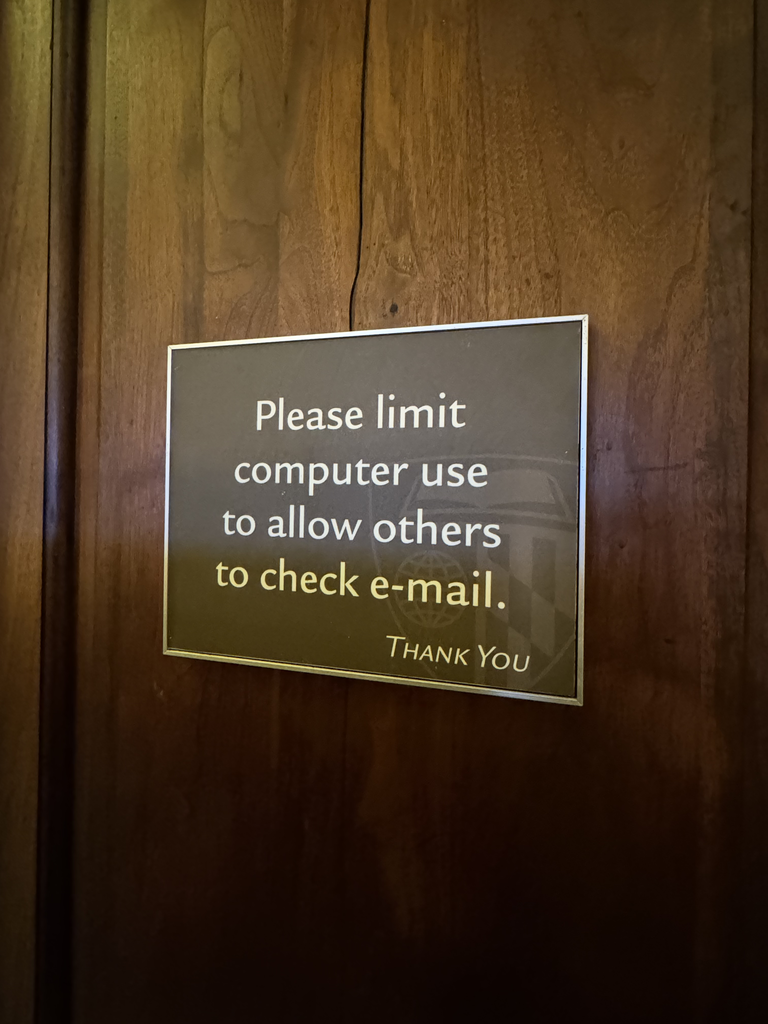


### Translation:
Bitte die Nutzung der Computer auf ein Minimum beschränken, um anderen die Möglichkeit zu geben, ihre E-Mails zu überprüfen. Vielen Dank.


In [ ]:
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'''))

image = PIL.Image.open(requests.get(image_url, stream=True).raw)
display(Markdown("###Source image:"))
display(image)
display(Markdown(rf"""
### Translation:
{output[0]["generated_text"][-1]["content"].replace("\n", "\n\n")}
"""))